# Exploratory analysis 

This notebook contains code for exploratory data analysis of data used in the project: Public attitudes and ethical guidelines in digital field experiments (digex).

# TO DO

**We can roughly use the below bullet points taken from [2022-digex-study-design](https://docs.google.com/document/d/1nsaXEn04s9LTsjqrpbUpZlyQ3CAcuqkOwy1ZM0d-kKY/edit#) as section headings for this notebook to conduct the exploratory analysis**:

- To address question 1, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for the variables: awareness of the fact that academic researchers use social media data, awareness of the advantages of social media data that account for why academics collect them, awareness of social media data use, and awareness of social media interaction methods. 

- To address question 2, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for each of the 4 vignette studies presented in section 2 of the survey for the variable: attitudes towards actual research studies. 

- To address question 3, we will provide frequency tables or plots for the variables attitudes towards study design factors and attitudes towards ethical principles. Moreover, we will also use a mixed-methods approach to analyze open-ended free-text responses (see below).

- To further address questions 1-3, open-ended free-text inputs of both the open “other” options of selection items and the  open-ended free-text answers (i.e., what do you think it means for an academic study to receive "ethical approval”, describe any concerns you might have, what additional information about the study or the researchers that would influence your level of concern, are there any other features of research that are important for determining your level of concern, are there any additional factors that you think should be libsidered) will be analyzed using a mixed-methods approach to detect common topics, sentiments, and themes. 

## Set working directory

In [1]:
import pathlib   # Change cwd
import os 

path = pathlib.Path.cwd().parent
os.chdir(path)

## Imports

In [2]:
import joypy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Plotting presets

In [ ]:
digex_style = config.MPL_STYLE_FILEPATH
digex_palette = config.PALETTE

plt.style.use(digex_style)
sns.color_palette(digex_palette)

## Load processed data

In [ ]:
processed_data_path = get_data_filepath(
    file=config.PROCESSED_DATA_FILEPATH, 
    data_path=config.PROCESSED_DATA_DIR,
    main=False
) 

digex_df = pd.read_csv(processed_data_path, index_col=0)

digex_df.head()

The above didn't work for me (Jason), so using the below.

In [3]:
digex_df = pd.read_csv('/Users/jasonburton/Documents/GitHub/article-digex-survey/data/processed/digex-survey-responses-processed.csv', index_col=0)

digex_df.head()

,duration_sec,finished,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos,aware_sm_advan_score,aware_sm_interact_score,aware_sm_use_score
1,912.0,True,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,9
2,720.0,True,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,9
3,1874.0,True,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5
4,1264.0,True,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,1.0,NaN,8.0,NaN,NaN,NaN,NaN,1,1,6
5,556.0,True,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,9


## Exploratory data analysis

Resources:
- https://aeturrell.github.io/coding-for-economists/data-exploratory-analysis.html#the-pandas-profiling-package
- https://deepnote.com/@deepnote/Joyplot-Introduction-4666e1a3-3249-442e-9a94-2bbcc5cb1b1d

### Demographics

see `02-digex-summary-statistics.ipynb`

(VS: I've added both our code there; apologies for not making it clear that I had already done some demographic summary stats!)

### Prior awareness

**Variables to examine: 8-15**

JB: struggling here... trying to parse the values to make dummy variables such that theres a separate column for `… are always representative of people’s offline behavior`, `… are naturalistic in that they do not require researchers to directly interact with research volunteers`, etc. with a 1 indicating that the participant checked the box and 0 indicating that they didn't

In [4]:
# remove brackets from the column values
digex_df['aware_sm_advan'] = digex_df['aware_sm_advan'].replace('\[', '', regex=True).replace('\]', '', regex=True)

# parse by comma separators
digex_df['aware_sm_advan'] = digex_df['aware_sm_advan'].apply(lambda x: x.split(','))

In [5]:
# get dummies
dummy_df = pd.get_dummies(digex_df['aware_sm_advan'].apply(pd.Series).stack()).sum(level=0)

/var/folders/hb/n58jwxy14vnc7667mqz9vyn40000gn/T/ipykernel_71777/2288516674.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(digex_df['aware_sm_advan'].apply(pd.Series).stack()).sum(level=0)


In [6]:
# view dummies
dummy_df

,'… are always representative of people’s offline behavior','… are naturalistic in that they do not require researchers to directly interact with research volunteers','… are readily accessible to researchers and easy to collect','… are unaffected by the way social media platforms work','… are well formatted and never contain any missing data','… often capture social relationships not found using traditional methods (e.g. surveys)','… reflect events in real-time and can be collected continuously over time','None of the above','… are always representative of people’s offline behavior','… are large and can contain millions of data points','… are naturalistic in that they do not require researchers to directly interact with research volunteers','… are readily accessible to researchers and easy to collect','… are unaffected by the way social media platforms work','… often capture social relationships not found using traditional methods (e.g. surveys)','… reflect events in real-time and can be collected continuously over time'
1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0
496,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1
497,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
498,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


**Why does `dummy_df` have 15 columns with some column names looking identical?**

### Study descriptions

**Variables to examine: 16-27**

#### Study 1

In [7]:
digex_df['study_1_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.314629
Somewhat acceptable        0.288577
Somewhat unacceptable      0.162325
Neutral                    0.124248
Completely unacceptable    0.110220
Name: study_1_ethic_acc, dtype: float64

#### Study 2

In [8]:
digex_df['study_2_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.266533
Completely acceptable      0.232465
Somewhat unacceptable      0.222445
Neutral                    0.164329
Completely unacceptable    0.114228
Name: study_2_ethic_acc, dtype: float64

#### Study 3

In [9]:
digex_df['study_3_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.498998
Somewhat acceptable        0.268537
Neutral                    0.112224
Somewhat unacceptable      0.078156
Completely unacceptable    0.042084
Name: study_3_ethic_acc, dtype: float64

#### Study 4

In [10]:
digex_df['study_4_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.242485
Completely acceptable      0.230461
Somewhat unacceptable      0.220441
Neutral                    0.176353
Completely unacceptable    0.130261
Name: study_4_ethic_acc, dtype: float64

#### Study comparison

In [11]:
digex_df['Hangartner et al.'] = digex_df['study_1_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Pennycook et al.'] = digex_df['study_2_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Levy'] = digex_df['study_3_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

digex_df['Mosleh et al.'] = digex_df['study_4_ethic_acc'].map({'Completely unacceptable': -2, 
                                                                       'Somewhat unacceptable': -1, 
                                                                       'Neutral': 0, 
                                                                       'Somewhat acceptable': 1, 
                                                                       'Completely acceptable': 2})

In [12]:
# Create a list to hold the re-coded values
recoded_values = []

# Iterate over the values in the column
for value in digex_df['politic_views']:
    # Check the value and assign a new value based on the criteria
    if value in ["Very liberal", "Slightly liberal"]:
        recoded_value = "liberal"
    elif value in ["Very conservative", "Slightly conservative"]:
        recoded_value = "conservative"
    else:
        recoded_value = "other"
        
    # Add the recoded value to the list
    recoded_values.append(recoded_value)

In [13]:
digex_df['Politics'] = recoded_values

In [14]:
study_comparison = digex_df[['Politics', 'Hangartner et al.', 'Pennycook et al.', 'Levy', 'Mosleh et al.']]

In [15]:
# mean acceptance by study (-2 = completely unacceptable; 2 = completely acceptable)
study_comparison.mean(numeric_only=True)

Hangartner et al.    0.535070
Pennycook et al.     0.280561
Levy                 1.104208
Mosleh et al.        0.222445
dtype: float64

In [16]:
# Use the melt function to reshape the dataframe
study_comparison = study_comparison.melt(id_vars="Politics", var_name="Study", value_name="value")
study_comparison

,Politics,Study,value
0,liberal,Hangartner et al.,0
1,other,Hangartner et al.,2
2,liberal,Hangartner et al.,2
3,conservative,Hangartner et al.,0
4,liberal,Hangartner et al.,2
...,...,...,...
1991,other,Mosleh et al.,2
1992,conservative,Mosleh et al.,2
1993,liberal,Mosleh et al.,2
1994,liberal,Mosleh et al.,0


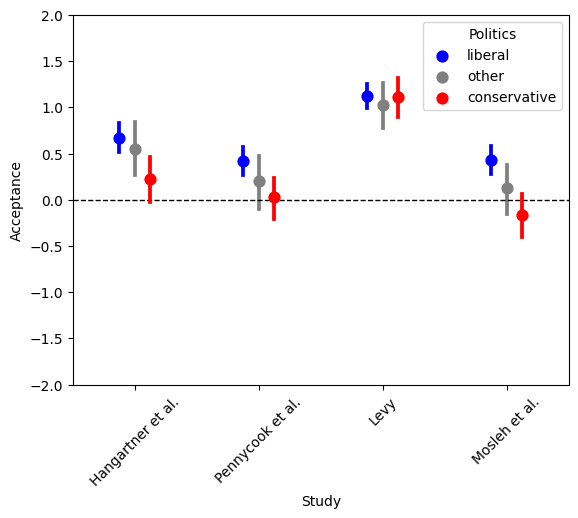

In [17]:
# Use seaborn's pointplot function to create the error plot
sns.pointplot(x="Study", y="value", hue="Politics", data=study_comparison, dodge=0.25, join=False,
              palette={"liberal": "blue", "conservative": "red", "other": "grey"})

# Get the current tick locations and labels
xticks, xticklabels = plt.xticks()

# Set the tick labels to be rotated by 45 degrees
plt.xticks(xticks, xticklabels, rotation=45)

# Adjust the y axis
plt.ylim(-2, 2)
plt.ylabel("Acceptance")

# Add a thin, dashed, horizontal line through 0 on the y-axis using the axhline function
plt.axhline(0, linestyle="--", linewidth=1, color="black")

# Show the plot
plt.show()

### Study design features

In [18]:
# Select columns with index positions 25 through 34 (inclusive)
design_fts = digex_df.iloc[:, 25:34]

# Recode the values in the column using the replace function
design_fts = design_fts.replace({"Not at all important": 0, "Slightly important": 1, "Moderately important": 2, "Very important": 3, "Extremely important": 4})

In [19]:
# inspect average importance rating of each study design feature
design_fts.mean(numeric_only=True).sort_values(ascending=False)

design_partic_aware    2.799599
design_cont            2.464930
design_inter_type      2.438878
design_type_data       2.376754
design_res_purp        2.360721
design_inter_impact    2.310621
design_admin_inter     1.917836
design_len_data        1.861723
design_num_users       1.857715
dtype: float64

In [20]:
design_plot = design_fts.melt(var_name="Feature", value_name="Importance")

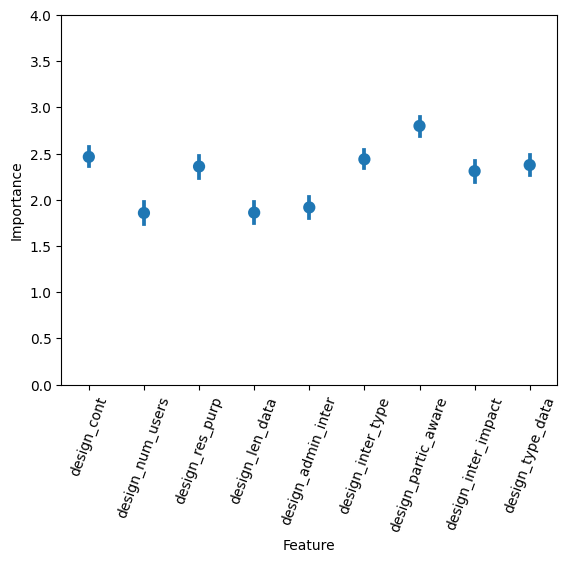

In [21]:
# Use seaborn's pointplot function to create the error plot
sns.pointplot(x="Feature", y="Importance", data=design_plot, join=False)

# Shift the x-axis ticks to the left using the tick_params function
plt.tick_params(axis='x', labelrotation=70)

# Adjust the y axis
plt.ylim(0, 4)

# Show the plot
plt.show()

### Ethical priorities

In [22]:
ranks = digex_df[['rank_sci_repro', 'rank_resp', 'rank_just', 'rank_anony', 'rank_harms', 'rank_balance', 'rank_pub_interst']]

Ranks by means (lower value = higher priority).

In [23]:
ranks_means = ranks.mean()
ranks_means.sort_values(inplace=True, ascending=True)
ranks_means

rank_harms          2.697395
rank_anony          3.054108
rank_resp           3.527054
rank_pub_interst    3.573146
rank_just           4.651303
rank_balance        4.975952
rank_sci_repro      5.521042
dtype: float64

Ranks by Borda count (higher value = higher priority).

In [24]:
ranks_borda = ranks.replace({1:6, 2:5, 3:4, 4:3, 5:2, 6:1, 7:0})    
ranks_borda = ranks_borda.sum()
ranks_borda.sort_values(inplace=True, ascending=False)
ranks_borda

rank_harms          2147.0
rank_anony          1969.0
rank_resp           1733.0
rank_pub_interst    1710.0
rank_just           1172.0
rank_balance        1010.0
rank_sci_repro       738.0
dtype: float64